# Predictive Modeling - Linear Discriminant Analysis

In [ ]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Set the working directory

In [ ]:
#os.chdir('C:\\GL Class\Solution Preparation\Logistic Regression - Python')

# Import Excel file

Load the Data file into Python DataFrame using pandas read_csv method

Ensure that data set loaded do not have any unicode character 

In [ ]:
data_df = pd.read_csv("default(HandsOnVideo Content).csv")


# View Top 10 rows

head function is used to view the top records. The number records to be view need to be  given in the parenthesis.

In [ ]:
data_df.head(10)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2
5,Female,1,Management,12,86,3.6,No,critical,1,personal,4
6,Female,1,Management,15,86,3.6,No,critical,1,personal,4
7,Male,1,skilled,12,85,3.6,No,poor,1,personal,2
8,Male,1,skilled,13,87,3.9,No,critical,1,personal,2
9,Male,1,skilled,13,89,4.0,No,critical,1,personal,0


# Some more basic commands

tail function is used to view the last records. The number records to be view need to be given in the parenthesis.

In [ ]:
data_df.tail(20)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
761,Male,1,Management,0,43,14.0,Default,good,0,car,1
762,Male,1,Management,2,47,14.0,Default,verygood,0,car,1
763,Female,1,skilled,5,58,14.0,Default,critical,0,personal,0
764,Female,1,skilled,6,58,14.0,Default,critical,0,personal,0
765,Male,1,skilled,1,42,14.0,Default,critical,0,consumer.durable,0
766,Male,1,skilled,4,47,14.0,Default,critical,0,consumer.durable,0
767,Male,1,skilled,3,47,14.2,Default,critical,0,consumer.durable,0
768,Male,1,skilled,1,42,14.2,Default,critical,0,consumer.durable,0
769,Male,1,skilled,4,52,14.3,Default,good,0,car,0
770,Male,1,skilled,3,42,14.3,Default,good,0,car,0


In [ ]:
data_df.describe()

,Loan.Offered,Work.Exp,Credit.Score,EMI.Ratio,Own house,Dependents
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.756722,12.377721,83.597951,9.495006,0.768246,2.081946
std,0.429336,3.809161,12.040410,2.786867,0.422223,1.068641
min,0.000000,0.000000,42.000000,3.000000,0.000000,0.000000
25%,1.000000,11.000000,83.000000,7.400000,1.000000,2.000000
50%,1.000000,13.000000,87.000000,9.500000,1.000000,2.000000
75%,1.000000,15.000000,91.000000,11.400000,1.000000,3.000000
max,1.000000,19.000000,99.000000,15.000000,1.000000,4.000000


In [ ]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house           int64
Purpose            object
Dependents          int64
dtype: object

In [ ]:
type(data_df)

pandas.core.frame.DataFrame

# Check for missing values

In [ ]:
data_df.isnull().sum()

Gender            0
Loan.Offered      0
Job               0
Work.Exp          0
Credit.Score      0
EMI.Ratio         0
Status            0
Credit.History    0
Own house         0
Purpose           0
Dependents        0
dtype: int64

No Missing values

In [ ]:
data_df.shape ### 781 rows and 11 features

(781, 11)

# Convert Own House into object

In [ ]:
data_df['Own house']=data_df['Own house'].astype('object')

# Find out unique values in each categorical column



In [ ]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data_df['Job'].unique()

array(['unskilled', 'skilled', 'Management'], dtype=object)

In [ ]:
data_df['Status'].unique() ### No means No Default

array(['No', 'Default'], dtype=object)

In [ ]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'very good', 'verygood', 'Poor'],
      dtype=object)

In [ ]:
data_df['Own house'].unique()

array([1, 0], dtype=object)

In [ ]:
data_df['Purpose'].unique()

array(['personal', 'car', 'education', 'consumer.durable'], dtype=object)

In [ ]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house          object
Purpose            object
Dependents          int64
dtype: object

# Clean the dataset -- Correction in the values

In [ ]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='very good', 'verygood', data_df['Credit.History'])

In [ ]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='Poor', 'poor', data_df['Credit.History'])

In [ ]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'verygood'], dtype=object)

# Count of Default and No Default in the Target Column

In [ ]:
data_df['Status'].value_counts()

No         656
Default    125
Name: Status, dtype: int64

# Univariate Plots


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


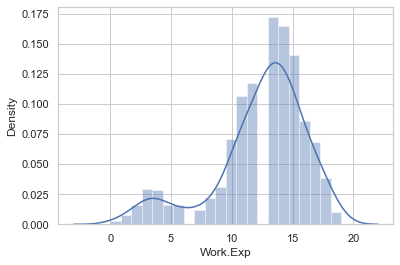

In [ ]:
sns.distplot(data_df['Work.Exp'])
plt.show() ### Not required in this version, inserted just to show that if graph is not printing then this is required

# Bivariate Analysis 


Bivariate shown below is only as a sample.. Reader is adviced to perform complete data exploration process

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


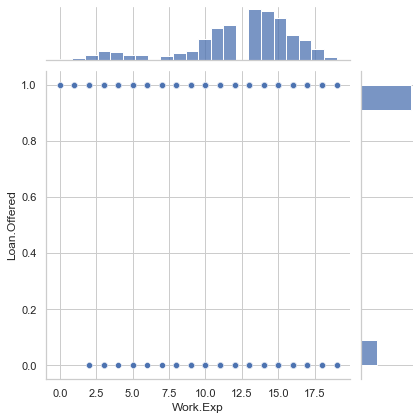

In [ ]:
sns.jointplot(data_df['Work.Exp'], data_df['Loan.Offered']) ### annotate function of stats is to print correlation value

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='Work.Exp'>

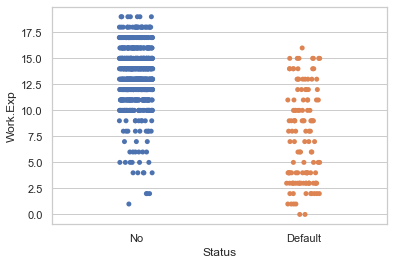

In [ ]:
sns.stripplot(data_df['Status'], data_df['Work.Exp']) ### Concentration of observations

Lower Work Experience have more concentration of Default.. Reader is adviced to perform more analysis and generate insight.

# Find the Distribution of Dependent Variable Categories


In [ ]:
count_no_sub = len(data_df[data_df['Status']=='No'])
count_sub = len(data_df[data_df['Status']=='Default'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Default", pct_of_sub*100)

percentage of no Default is 83.99487836107554
percentage of Default 16.005121638924454


Distribution is not biased and hence no need to use SMOTE or any other package to balance binary classes

Text(0, 0.5, 'Status')

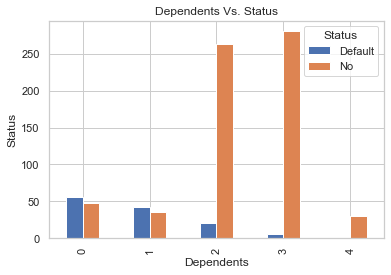

In [ ]:
pd.crosstab(data_df.Dependents,data_df.Status).plot(kind='bar')
plt.title('Dependents Vs. Status')
plt.xlabel('Dependents')
plt.ylabel('Status')


Below commands are only done as a good practice.. Not mandatory

In [ ]:
data_df.rename(columns = {'Own house':'Ownhouse'}, inplace = True) 
data_df.rename(columns = {'Loan.Offered':'LoanOffered'}, inplace = True) 
data_df.rename(columns = {'Work.Exp':'WorkExp'}, inplace = True) 
data_df.rename(columns = {'Credit.Score':'CreditScore'}, inplace = True) 
data_df.rename(columns = {'EMI.Ratio':'EMIRatio'}, inplace = True) 
data_df.rename(columns = {'Credit.History':'CreditHistory'}, inplace = True) 


In [ ]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    object 
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 67.2+ KB


# Convert Object Feature types for Linear Discriminant Analysis

In [ ]:
data_df['Gender']=np.where(data_df['Gender'] =='Male', 1, data_df['Gender'])
data_df['Gender']=np.where(data_df['Gender'] =='Female', 0, data_df['Gender'])

In [ ]:
data_df['Job']=np.where(data_df['Job'] =='Management', 1, data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='unskilled', 0, data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='skilled', 2, data_df['Job'])

In [ ]:
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='critical', 1, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='poor', 0, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='good', 2, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='verygood', 3, data_df['CreditHistory'])

In [ ]:
data_df['Purpose']=np.where(data_df['Purpose'] =='personal', 1, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='car', 0, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='education', 2, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='consumer.durable', 3, data_df['Purpose'])


In [ ]:
data_df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,1,0,0,14,86,3.0,No,0,1,1,2
1,0,1,2,15,94,3.0,No,0,1,1,3
2,1,0,0,16,86,3.0,No,0,1,1,2
3,0,1,2,13,94,3.0,No,0,1,1,3
4,1,1,2,12,85,3.3,No,0,1,1,2


In [ ]:
#Scaling the data which is a pre-requisite for LDA 
scaler=StandardScaler()
X = scaler.fit_transform(data_df.drop(['Status'],axis=1))
Y = data_df['Status']

In [ ]:
Y.value_counts()

No         656
Default    125
Name: Status, dtype: int64

In [ ]:
Y.replace({"No":1,"Default":0})

0      1
1      1
2      1
3      1
4      1
      ..
776    0
777    0
778    0
779    0
780    0
Name: Status, Length: 781, dtype: int64

In [ ]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [ ]:
# Predict it
pred_class = model.predict(X)
data_df['Prediction'] = pred_class 


In [ ]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= data_df[['Gender','LoanOffered','Job','WorkExp','CreditScore','EMIRatio','CreditHistory','Ownhouse','Purpose','Dependents']]
Cor1 = data.corr()
Cor1

,LoanOffered,WorkExp,CreditScore,EMIRatio,Dependents
LoanOffered,1.000000,-0.076224,-0.082435,0.057273,-0.029145
WorkExp,-0.076224,1.000000,0.915575,-0.300286,0.408753
CreditScore,-0.082435,0.915575,1.000000,-0.382192,0.490798
EMIRatio,0.057273,-0.300286,-0.382192,1.000000,-0.251782
Dependents,-0.029145,0.408753,0.490798,-0.251782,1.000000


In [ ]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class)


array([[124,   1],
       [ 22, 634]], dtype=int64)

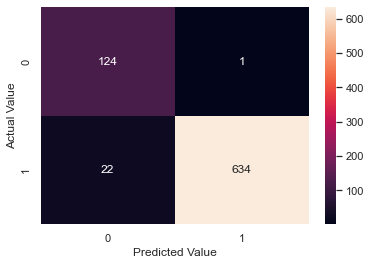

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

### 146 rows classified as 0 (Default) and 635 rows classified as 1 (Not Default)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

     Default       0.85      0.99      0.92       125
          No       1.00      0.97      0.98       656

    accuracy                           0.97       781
   macro avg       0.92      0.98      0.95       781
weighted avg       0.97      0.97      0.97       781



In [ ]:
X.shape

(781, 10)

In [ ]:
model.coef_

array([[ 1.137129  , -0.46395456,  0.83372221, -1.08383805,  3.80345376,
        -0.53102867,  0.36191579,  5.95912536,  0.14435512,  2.30379498]])

In [ ]:
model.intercept_

array([9.15964746])

### LDF for the above model will be

In [ ]:
'''
LDF=9.159+ X1*1.137 + X2*(-0.463) + X3*(0.833) + X4*(-1.083) + X5*3.803 + X6*(-0.531) + X7*0.361 + X8*5.959 + X9*0.144 + X10*2.30
'''

'\nLDF=9.159+ X1*1.137 + X2*(-0.463) + X3*(0.833) + X4*(-1.083) + X5*3.803 + X6*(-0.531) + X7*0.361 + X8*5.959 + X9*0.144 + X10*2.30\n'

### So from the above equation the following things can be summarized as

- the coeff of X8 predictor is largest in magnitude thus it helps in discriminating the target the best 
- the coeff of X2 predictor is smallest in magnitude thus it helps in discriminating the target the least.
- all the DS can be computed for each row using the above f(x) which will aid in classification

## Classification by Discriminant Score

In [ ]:
#Computation of Discriminant Scores/LDF for each row of data


DS=[]
coef=[1.137129  , -0.46395456,  0.83372221, -1.08383805,  3.80345376,
        -0.53102867,  0.36191579,  5.95912536,  0.14435512,  2.30379498] # Coefficients 
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1]):
        s3=s3+(X[p,q]*coef[q]) # Building the LDF equation 
    s3=s3+9.159
    DS.append(s3)
    
    

In [ ]:
'''
Classification Rule :

if LDF>=0 then Classify as 1 
else if LDF <0 then Classify as 0 
'''


s1=0
s2=0
for i in range(len(X)):
    if DS[i]>=0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],">=0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1+=1
    elif DS[i]<0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],"<0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2+=1



FOR Row: 0   [ 0.65206018 -1.76366843 -2.20488852  0.42616174  0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { DS:  12.795920822262884 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1   [-1.53360077  0.567       0.58832792  0.68885497  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85963561]

--> { DS:  15.959211343453298 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 2   [ 0.65206018 -1.76366843 -2.20488852  0.9515482   0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { DS:  12.226486990137262 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 3   [-1.53360077  0.567       0.58832792  0.16346851  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85963561]

--> { DS:  16.528645175578

FOR Row: 170   [ 0.65206018 -1.76366843 -2.20488852  0.42616174  0.78137483 -0.82403535
  0.1411477   0.5492419   1.13997924 -0.07673177]

--> { DS:  15.139965653007252 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 171   [ 0.65206018  0.567      -0.8082803  -0.8873044  -0.63144195 -0.78812977
  0.1411477   0.5492419   1.13997924  0.85963561]

--> { DS:  13.411157536057388 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 172   [ 0.65206018 -1.76366843 -0.8082803  -0.62461117  0.11651988 -0.78812977
 -0.83439528  0.5492419   0.35693281  0.85963561]

--> { DS:  16.58650191950617 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 173   [ 0.65206018 -1.76366843 -0.8082803  -0.62461117 -0.2159076  -0.78812977
  0.1411477   0.5492419   1.13997924  0.85963561]

--> { DS:  15.78823

--> { DS:  3.2379565505880095 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 381   [-1.53360077  0.567       0.58832792  0.9515482   0.44894735  0.03769856
  1.11669069  0.5492419  -1.20916004  0.85963561]

--> { DS:  13.78177034217124 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 382   [ 0.65206018  0.567       0.58832792  1.21424143  0.78137483  0.03769856
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { DS:  15.08960596353588 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 383   [ 0.65206018  0.567       0.58832792  0.16346851  0.69826796  0.03769856
  1.11669069 -1.82069139  1.13997924  0.85963561]

--> { DS:  4.285959674614469 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 384   [ 0

------------------------------------------------------------------------------------------
FOR Row: 486   [-1.53360077  0.567       0.58832792 -0.62461117 -0.13280073  0.50447109
  1.11669069  0.5492419  -1.20916004  0.85963561]

--> { DS:  13.029550287736026 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 487   [ 0.65206018 -1.76366843 -2.20488852 -0.09922471  0.03341301  0.50447109
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { DS:  12.173040381207272 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 488   [ 0.65206018  0.567       0.58832792  1.73962788  1.28001605  0.50447109
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { DS:  16.168861352303296 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 489   [ 0.65206018  0.567       0.58832792  0.9515482   0

FOR Row: 749   [-1.53360077  0.567       0.58832792 -2.46346377 -2.54289996  1.68935521
 -1.80993827 -1.82069139 -0.42611361 -1.94946653]

--> { DS:  -16.313821118789228 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 750   [ 0.65206018  0.567      -0.8082803  -2.46346377 -2.62600683  1.76116637
 -1.80993827 -1.82069139 -0.42611361 -1.94946653]

--> { DS:  -15.347052874529 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 751   [ 0.65206018 -1.76366843 -2.20488852 -0.8873044  -1.54561752  1.76116637
 -1.80993827 -1.82069139 -0.42611361 -1.94946653]

--> { DS:  -13.029202646510553 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 752   [ 0.65206018  0.567      -0.8082803  -1.67538408 -1.96115187  1.79707195
 -1.80993827 -1.82069139 -0.42611361 -1.94946653]

--> { DS:  -13.691525

In [ ]:
print(s1," rows classified as 1 (Not Default) ")
print(s2," rows classified as 0 (Default) ")

635  rows classified as 1 (Not Default) 
146  rows classified as 0 (Default) 


## Classification by Probability 

In [ ]:
pred_prob=model.predict_proba(X)#Posterior Probability for each row

In [ ]:
pred_prob[:,1]

array([9.99997230e-01, 9.99999883e-01, 9.99995104e-01, 9.99999934e-01,
       9.99999346e-01, 9.99999818e-01, 9.99999571e-01, 9.99999307e-01,
       9.99999636e-01, 9.99985261e-01, 9.99999641e-01, 9.99964028e-01,
       9.99999504e-01, 9.99999816e-01, 9.99999944e-01, 9.99999600e-01,
       9.99998776e-01, 9.99998879e-01, 9.99999957e-01, 9.99969492e-01,
       9.99968905e-01, 9.99999447e-01, 9.99945047e-01, 9.99999605e-01,
       9.99999805e-01, 9.99945047e-01, 9.99999605e-01, 9.99999000e-01,
       9.99999867e-01, 9.99999426e-01, 9.99999849e-01, 9.99999886e-01,
       9.99999276e-01, 9.99999662e-01, 9.99997674e-01, 9.99998690e-01,
       9.99999591e-01, 9.99998592e-01, 9.99999019e-01, 9.99999578e-01,
       9.99999583e-01, 9.99998721e-01, 9.99999784e-01, 9.99999548e-01,
       9.99999352e-01, 9.99999747e-01, 9.99999878e-01, 9.99999809e-01,
       9.99999421e-01, 9.99999417e-01, 9.99997974e-01, 9.99999957e-01,
       9.99999930e-01, 9.99995647e-01, 9.99998811e-01, 9.99999106e-01,
      

In [ ]:
'''
Classification Rule :

if prob(Y=1|X) >=0 then Classify as 1 
else ifprob(Y=1|X) <0 then Classify as 0 
'''


s3,s4=0,0
for i in range(len(pred_prob[:,1])):
    if pred_prob[:,1][i]>=0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">=0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3+=1
    elif pred_prob[:,1][i]<0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],"< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4+=1

  

FOR Row: 0   [ 0.65206018 -1.76366843 -2.20488852  0.42616174  0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { prob(Y=1|X) = 0.999997229744646 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1   [-1.53360077  0.567       0.58832792  0.68885497  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85963561]

--> { prob(Y=1|X) = 0.9999998828556507 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 2   [ 0.65206018 -1.76366843 -2.20488852  0.9515482   0.19962674 -2.33206968
 -1.80993827  0.5492419  -0.42611361 -0.07673177]

--> { prob(Y=1|X) = 0.9999951042317538 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 3   [-1.53360077  0.567       0.58832792  0.16346851  0.8644817  -2.33206968
 -1.80993827  0.5492419  -0.42611361  0.85


--> { prob(Y=1|X) = 0.9999969486929297 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 176   [ 0.65206018  0.567       0.58832792 -0.09922471 -0.04969386 -0.78812977
  0.1411477   0.5492419   1.13997924 -1.94946653]

--> { prob(Y=1|X) = 0.9999223401198473 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 177   [-1.53360077  0.567       0.58832792 -0.62461117  0.03341301 -0.78812977
 -0.83439528  0.5492419   0.35693281  0.85963561]

--> { prob(Y=1|X) = 0.9999990518354522 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 178   [ 0.65206018  0.567       0.58832792 -0.62461117 -0.46522821 -0.78812977
  0.1411477   0.5492419   1.13997924 -0.07673177]

--> { prob(Y=1|X) = 0.9999971450666044 >=0.5 , Classify as 1 }
---------------------------------------------------------

FOR Row: 228   [ 0.65206018 -1.76366843 -2.20488852 -0.09922471  0.11651988 -0.60860187
  0.1411477   0.5492419   1.13997924 -1.94946653]

--> { prob(Y=1|X) = 0.9998419598820377 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 229   [-1.53360077 -1.76366843 -2.20488852 -0.8873044  -0.2159076  -0.60860187
 -0.83439528  0.5492419   0.35693281  0.85963561]

--> { prob(Y=1|X) = 0.9999929494476203 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 230   [-1.53360077  0.567       0.58832792  0.9515482   0.8644817  -0.60860187
 -0.83439528 -1.82069139  0.35693281  1.79600299]

--> { prob(Y=1|X) = 0.9630486279317375 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 231   [ 0.65206018  0.567       0.58832792  0.42616174  0.53205422 -0.60860187
 -0.83439528 -1.82069139  0.35693


--> { prob(Y=1|X) = 0.9999995502405723 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 327   [ 0.65206018  0.567       0.58832792  0.42616174  0.61516109 -0.2136405
  1.11669069 -1.82069139 -1.20916004 -1.01309915]

--> { prob(Y=1|X) = 0.3027488950456008 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 328   [ 0.65206018  0.567       0.58832792  0.42616174  0.53205422 -0.2136405
  1.11669069  0.5492419   1.13997924 -0.07673177]

--> { prob(Y=1|X) = 0.9999998085623163 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 329   [ 0.65206018  0.567       0.58832792 -0.09922471  0.36584048 -0.2136405
  0.1411477   0.5492419   1.13997924  0.85963561]

--> { prob(Y=1|X) = 0.9999999664451675 >=0.5 , Classify as 1 }
------------------------------------------------------------

FOR Row: 491   [ 0.65206018  0.567       0.58832792  1.47693465  1.03069544  0.50447109
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { prob(Y=1|X) = 0.9999998155609005 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 492   [-1.53360077  0.567      -0.8082803   0.16346851  0.28273361  0.54037667
  1.11669069  0.5492419  -1.20916004  1.79600299]

--> { prob(Y=1|X) = 0.9999995993835533 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 493   [-1.53360077 -1.76366843  0.58832792  0.42616174  0.36584048  0.54037667
  1.11669069  0.5492419  -1.20916004  0.85963561]

--> { prob(Y=1|X) = 0.9999996446443117 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 494   [ 0.65206018 -1.76366843  0.58832792  0.42616174  0.78137483  0.54037667
  1.11669069  0.5492419  -1.20916

--> { prob(Y=1|X) = 0.9999997250917233 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 530   [ 0.65206018  0.567      -0.8082803  -1.67538408 -1.62872439  0.75581015
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { prob(Y=1|X) = 0.9994525640071262 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 531   [ 0.65206018  0.567      -0.8082803  -0.36191794 -0.2159076   0.75581015
  1.11669069  0.5492419  -1.20916004  0.85963561]

--> { prob(Y=1|X) = 0.999998780312456 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 532   [-1.53360077  0.567       0.58832792  0.68885497  0.36584048  0.75581015
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { prob(Y=1|X) = 0.9999864959211395 >=0.5 , Classify as 1 }
-----------------------------------------------------------

FOR Row: 596   [ 0.65206018  0.567       0.58832792 -0.36191794  0.03341301  1.366205
  1.11669069  0.5492419  -1.20916004 -0.07673177]

--> { prob(Y=1|X) = 0.9999982365588524 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 597   [-1.53360077  0.567      -0.8082803  -0.36191794 -0.2159076   1.40211058
  1.11669069  0.5492419  -1.20916004  1.79600299]

--> { prob(Y=1|X) = 0.9999976131425959 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 598   [ 0.65206018  0.567       0.58832792 -0.09922471  0.03341301  1.40211058
 -1.80993827  0.5492419  -0.42611361 -1.94946653]

--> { prob(Y=1|X) = 0.9995400370210352 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 599   [-1.53360077  0.567       0.58832792  1.21424143  0.69826796  1.40211058
 -1.80993827 -1.82069139 -0.4261136

In [ ]:
print(s3," rows classified as 1 (Not Default) ")
print(s4," rows classified as 0 (Default) ")

635  rows classified as 1 (Not Default) 
146  rows classified as 0 (Default) 
